<a href="https://colab.research.google.com/github/Sonali749/MSC-Project/blob/main/Visualization(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar

In [ ]:
import datetime as dt
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [ ]:
pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 289kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
df = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [ ]:
#preview dataset
df.head()

,Region,Date,Frequency,Estimated_Unemployment_Rate,Estimated_Employed,Estimated_Labour_Participation_Rate,Region.1,longitude,latitude
0,Andhra Pradesh,31-03-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-03-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.tail()

,Region,Date,Frequency,Estimated_Unemployment_Rate,Estimated_Employed,Estimated_Labour_Participation_Rate,Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Region                                267 non-null    object 
 1    Date                                 267 non-null    object 
 2    Frequency                            267 non-null    object 
 3    Estimated_Unemployment_Rate          267 non-null    float64
 4    Estimated_Employed                   267 non-null    int64  
 5    Estimated_Labour_Participation_Rate  267 non-null    float64
 6   Region.1                              267 non-null    object 
 7   longitude                             267 non-null    float64
 8   latitude                              267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df.columns =['States','Date','Frequency','Estimated_Unemployment_Rate','Estimated_Employed','Estimated_Labour_Participation_Rate','Region','longitude','latitude']


In [ ]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [ ]:
df['Month'] = df['Date'].dt.month


In [ ]:
df['Month_int'] = df['Month'].apply(lambda x : int(x))

In [ ]:
df['Month_name'] =  df['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
df['Region'] = df['Region'].astype('category')

In [ ]:
df.drop(columns='Month',inplace=True)
df.head(3)

,States,Date,Frequency,Estimated_Unemployment_Rate,Estimated_Employed,Estimated_Labour_Participation_Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-03-31,M,5.48,16635535,41.02,South,15.9129,79.74,3,Mar
1,Andhra Pradesh,2020-03-29,M,5.83,16545652,40.90,South,15.9129,79.74,3,Mar
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar


In [ ]:
dataset_stats = df[['Estimated_Unemployment_Rate',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate']]

In [ ]:
round(dataset_stats.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated_Unemployment_Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated_Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated_Labour_Participation_Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [ ]:
region_stats = df.groupby(['Region'])[['Estimated_Unemployment_Rate','Estimated_Employed','Estimated_Labour_Participation_Rate']].mean().reset_index()

In [ ]:
region_stats = round(region_stats,2)

In [ ]:
region_stats

,Region,Estimated_Unemployment_Rate,Estimated_Employed,Estimated_Labour_Participation_Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


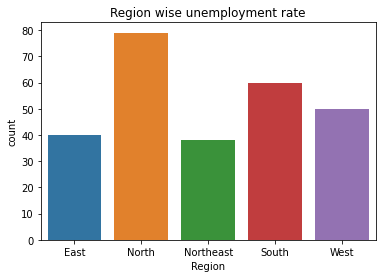

In [ ]:
sns.countplot(x='Region',data=df)
plt.title("Region wise unemployment rate")

plt.show()

In [ ]:
fig = px.box(df,x='States',y='Estimated_Unemployment_Rate',color='States',title='Unemployment rate',template='plotly')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


In [ ]:
fig = px.scatter_matrix(df,template='plotly',
    dimensions=['Estimated_Unemployment_Rate','Estimated_Employed',
                'Estimated_Labour_Participation_Rate'],
    color='Region')
fig.show()

In [ ]:
plot_ump = df[['Estimated_Unemployment_Rate','States']]

df_unemp = plot_ump.groupby('States').mean().reset_index()

df_unemp = df_unemp.sort_values('Estimated_Unemployment_Rate')

fig = px.bar(df_unemp, x='States',y='Estimated_Unemployment_Rate',color='States',
            title='Average Unemployment Rate in each state',template='plotly')

fig.show()

In [ ]:
fig = px.bar(df, x='Region',y='Estimated_Unemployment_Rate',animation_frame = 'Month_name',color='States',
            title='Unemployment rate across region from Jan.2020 to Oct.2020', height=700,template='plotly')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.show()

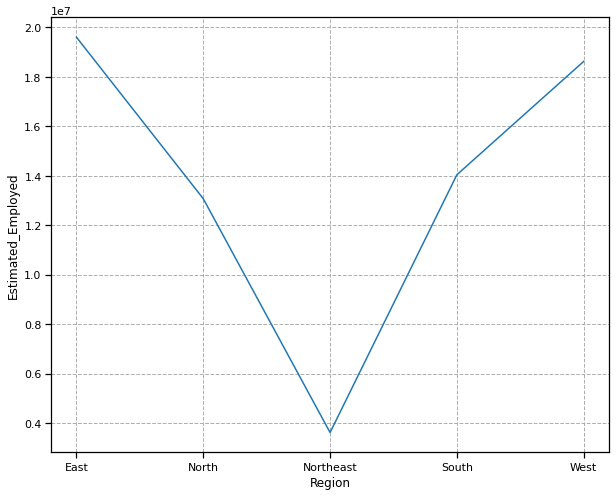

In [ ]:
plt.subplots(figsize=(10,8))
sns.lineplot(data=df, x='Region', y='Estimated_Employed', ci=None)
ax = plt.gca()
ax.grid(which='major', axis='both', linestyle='--')
plt.show()

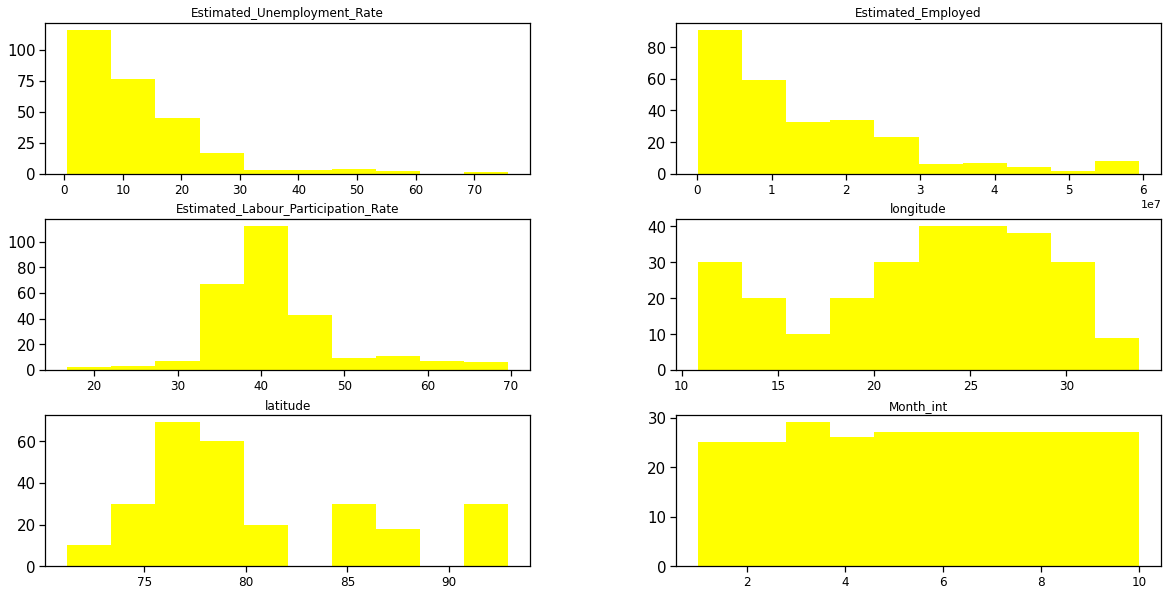

In [ ]:
df.hist(grid=False, xlabelsize=12, ylabelsize=15,figsize=(20,10), color = "yellow")
plt.show()

In [ ]:
unemplo_df = df[['States','Region','Estimated_Unemployment_Rate','Estimated_Employed','Estimated_Labour_Participation_Rate']]

unemplo = unemplo_df.groupby(['Region','States'])['Estimated_Unemployment_Rate'].mean().reset_index()

In [ ]:
fig = px.sunburst(unemplo, path=['Region','States'], values='Estimated_Unemployment_Rate',
                  color_continuous_scale='Plasma',title= 'unemployment rate in each region and state',
                  height=650,template='ggplot2')


fig.show()

In [ ]:
fig = px.scatter_geo(df,'longitude', 'latitude', color="Region",
                     hover_name="States", size="Estimated_Unemployment_Rate",
                     animation_frame="Month_name",scope='asia',template='plotly',title='Impack of lockdown on employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#6dd5ed",
    showocean=True)

fig.show()

In [ ]:
fig = px.line(df,x='Date', y='Estimated_Unemployment_Rate', color='Region',title='Unemployment Rate')
fig.show()

In [ ]:
lock = df[(df['Month_int'] >= 4) & (df['Month_int'] <=7)]
bf_lock = df[(df['Month_int'] >= 1) & (df['Month_int'] <=4)]

In [ ]:
g_lock = lock.groupby('States')['Estimated_Unemployment_Rate'].mean().reset_index()
g_bf_lock = bf_lock.groupby('States')['Estimated_Unemployment_Rate'].mean().reset_index()
g_lock['Unemployment Rate before lockdown'] = g_bf_lock['Estimated_Unemployment_Rate']
g_lock.columns = ['States','Unemployment Rate after lockdown','Unemployment Rate before lockdown']
g_lock.head(5)

,States,Unemployment Rate after lockdown,Unemployment Rate before lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250
2,Bihar,30.8025,20.7425
3,Chhattisgarh,9.6025,7.2450
4,Delhi,24.3600,17.6975


In [ ]:
# percentage change in unemployment rate
g_lock['percentage change in unemployment'] = round(g_lock['Unemployment Rate after lockdown'] - g_lock['Unemployment Rate before lockdown']/g_lock['Unemployment Rate before lockdown'],2)


In [ ]:
plot_per = g_lock.sort_values('percentage change in unemployment')

In [ ]:
# percentage change in unemployment after lockdown

fig = px.bar(plot_per, x='States',y='percentage change in unemployment',color='percentage change in unemployment',
            title='percentage change in Unemployment in each state after lockdown',template='ggplot2')

fig.show()

In [ ]:
# function to sort value based on impact

def sort_impact(x):
    if x <= 10:
        return 'impacted States'
    elif x <= 20:
        return 'hard impacted States'
    elif x <= 30:
        return 'harder impacted States'
    elif x <= 40:
        return 'hardest impacted States'
    return x   

In [ ]:
plot_per['impact status'] = plot_per['percentage change in unemployment'].apply(lambda x:sort_impact(x))

In [ ]:
fig = px.bar(plot_per, y='States',x='percentage change in unemployment',color='impact status',
            title='Impact of lockdown on employment across states',template='ggplot2',height=650)


fig.show()